In [1]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
# import PIL
# import tensorflow as tf
# import tensorflow_probability as tfp
# import tensorflow.contrib as tf_contrib
import time

import seaborn as sns
from data_utils import *


2022-10-04 17:35:04.541259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df_taxi = load_data('/Users/probook/Documents/GitHub/mobilityforecast/data/','yellow_tripdata_2021-0'+str(0+1)+'.parquet','parquet')

In [5]:
df = _data_preprocessing(df_taxi, 'Taxi', 2021, 1, True, 5)


 Taxi 2021 1 True 5


In [2]:
num_bins = 5
st_taxi = np.zeros((num_bins, num_bins, 1))
st_bike = np.zeros((num_bins, num_bins, 1))
for month in range(1):
    print('***********',month+1,'***********')
    df_taxi = load_data('/Users/probook/Documents/GitHub/mobilityforecast/data/','yellow_tripdata_2021-0'+str(month+1)+'.parquet','parquet')
    df_bike = load_data('/Users/probook/Documents/GitHub/mobilityforecast/data/','2021'+str(month+1)+'-citibike-tripdata.csv','csv')
    st_taxi, taxi_coords = data_preprocessing(df_taxi, 'Taxi', 2021, (month+1), True, num_bins)
    st_bike, bike_coords = data_preprocessing(df_bike, 'CitiBike', 2021, (month+1), True, num_bins)
    st_taxi = np.stack(arrays=[st_taxi, st_taxi])
    st_bike = np.stack(arrays=[st_bike, st_bike])
st_taxi = st_taxi[1:]
st_bike = st_bike[1:]
# df_weather = load_data('/Users/probook/Documents/GitHub/mobilityforecast/data/','manhattan.csv','csv')
# st_weather, weather_coords = data_preprocessing(df_weather, 'Weather', 2021, 1, True, num_bins)


*********** 1 ***********

 Taxi 2021 1 True 5
south:  40.5 north:  40.9 west:  -74.25 east:  -73.9
bins:  [40.5 40.6 40.7 40.8 40.9] [-74.25   -74.1625 -74.075  -73.9875 -73.9   ]

 CitiBike 2021 1 True 5
south:  40.5 north:  40.9 west:  -74.25 east:  -73.9
bins:  [40.5 40.6 40.7 40.8 40.9] [-74.25   -74.1625 -74.075  -73.9875 -73.9   ]


/Users/probook/opt/miniconda3/envs/mobility/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


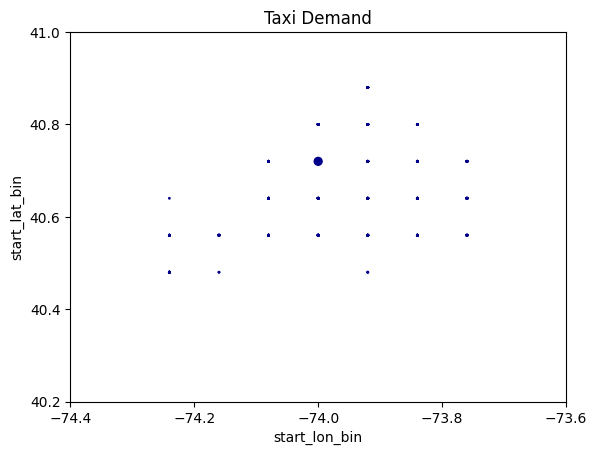

/Users/probook/opt/miniconda3/envs/mobility/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


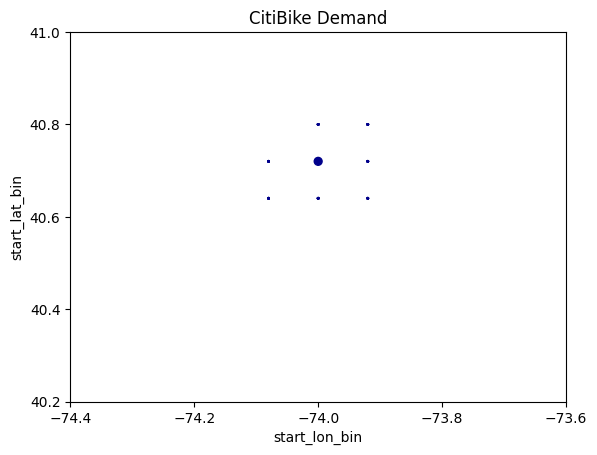

In [3]:
# plt.figure()
plt1 = demand_scatter(taxi_coords, 'Taxi')
plt2 = demand_scatter(bike_coords, 'CitiBike')

# plt.show(plt1, plt2)

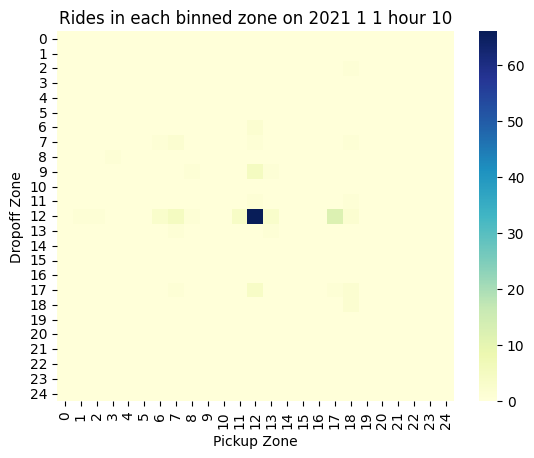

In [6]:
plot_heatmap(st_taxi[0,:,:,:], 2021, 1, 1, 10)
# st_taxi.shape

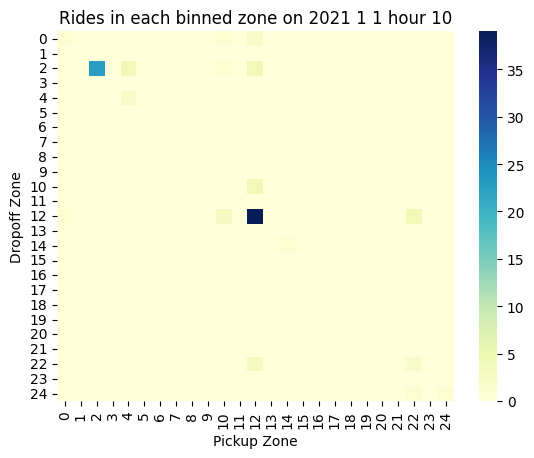

In [7]:
plot_heatmap(st_bike[0,:,:,:], 2021, 1, 1, 10)